In [1]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
hfont = {'fontname':'Myriad Pro'}
import matplotlib.ticker as mtick
from matplotlib import gridspec
import sys
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import warnings
warnings.filterwarnings('ignore')
import helper_functions as hfn

In [2]:
sns.set_style("ticks")

In [3]:
path = Path(os.getcwd()).parents[0]

modelpath = os.path.join(path, 'data/network_models/configuration_model')


datapath = os.path.join(modelpath, 'analysis')

figpath = os.path.join(path, 'figures')
hfn.dir_check(figpath)
    
figs3path = os.path.join(figpath, 'FigS10')
hfn.dir_check(figs3path)

figs3panelpaths = os.path.join(figs3path, 'panels')
hfn.dir_check(figs3panelpaths)

# load summary dataframe

In [4]:
pars_df = pd.read_hdf(os.path.join(datapath, 'allpars_df.h5'))

In [5]:
pars_df = pars_df.sort_values(by = ['input_degree', 'starter_degree'])

In [6]:
seq_col_bp= sns.color_palette("Oranges", 4)
seq_col_yg = sns.color_palette("Greens", 5)

In [7]:
pars_df_agg = pars_df.groupby(['starter_degree', 'input_degree']).agg({'slope' : ['mean', 'std'], 'intercept' : ['mean', 'std']})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


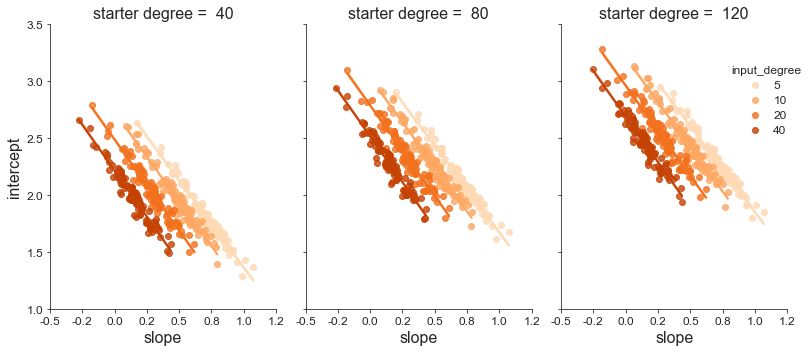

In [8]:
g1 = sns.lmplot(data=pars_df, x="slope", y="intercept", hue = 'input_degree', palette = seq_col_bp, col = 'starter_degree')# ax = ax1)
plt.xlim(-0.3,1.2) 
plt.ylim(1,3.5)
g1.fig.set_size_inches(11.25,5)

g1.axes[0,0].set_xlabel('slope', fontsize = 16)
g1.axes[0,1].set_xlabel('slope', fontsize = 16)
g1.axes[0,2].set_xlabel('slope', fontsize = 16)
g1.axes.flatten()[0].set_ylabel('intercept', fontsize = 16)
g1.set_titles(col_template='starter degree =  '+ "{col_name}", size  = 16)
plt.setp(g1._legend.get_title(), fontsize=12)
plt.setp(g1._legend.get_texts(), fontsize=12)
leg = g1._legend
leg.set_bbox_to_anchor([1,0.7]) 
xlabels =["%.1f"%i for i in g1.axes[0,0].get_xticks()]
g1.set_yticklabels(g1.axes[0,0].get_yticks(), size = 12)
g1.set_xticklabels(xlabels, size = 12)
g1.fig.tight_layout()
# plt.legend(loc='upper left')#),bbox_to_anchor=(1,0.5))
g1.axes[0,0].set_rasterized(True)
g1.axes[0,1].set_rasterized(True)
g1.axes[0,2].set_rasterized(True)
plt.savefig(os.path.join(figs3panelpaths, 'figS10b.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs3panelpaths, 'figS10b.eps'), bbox_inches = 'tight', format = 'eps', dpi = 200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


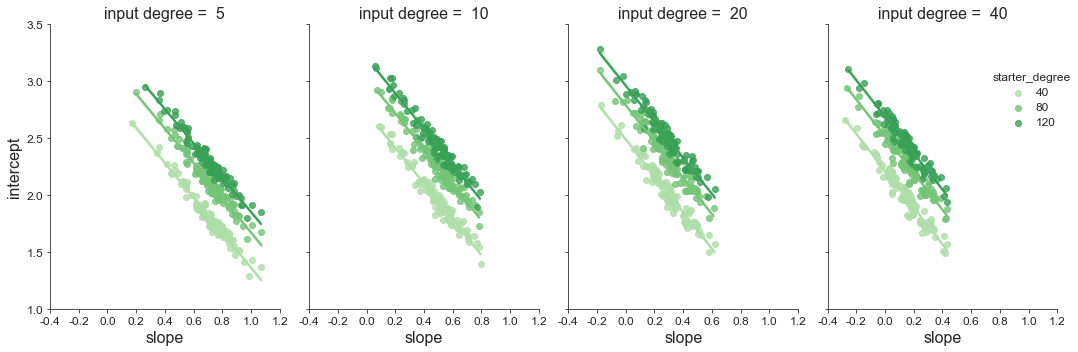

In [9]:
g2 = sns.lmplot(data=pars_df, x="slope", y="intercept", hue = 'starter_degree', palette = seq_col_yg[1:4], col = 'input_degree')# ax = ax1)
plt.xlim(-0.3,1.2) 
plt.ylim(1,3.5)
g2.fig.set_size_inches(15,5)

g2.axes[0,0].set_xlabel('slope', fontsize = 16)
g2.axes[0,1].set_xlabel('slope', fontsize = 16)
g2.axes[0,2].set_xlabel('slope', fontsize = 16)
g2.axes[0,3].set_xlabel('slope', fontsize = 16)
g2.axes.flatten()[0].set_ylabel('intercept', fontsize = 16)
g2.set_titles(col_template='input degree =  '+ "{col_name}", size  = 16)
plt.setp(g2._legend.get_title(), fontsize=12)
plt.setp(g2._legend.get_texts(), fontsize=12)
xlabels2 =["%.1f"%i for i in g2.axes[0,0].get_xticks()]
g2.set_yticklabels(g2.axes[0,0].get_yticks(), size = 12)
g2.set_xticklabels(xlabels2, size = 12)
g2.fig.tight_layout()
leg = g2._legend
leg.set_bbox_to_anchor([1,0.7]) 

g2.axes[0,0].set_rasterized(True)
g2.axes[0,1].set_rasterized(True)
g2.axes[0,2].set_rasterized(True)
g2.axes[0,3].set_rasterized(True)

plt.savefig(os.path.join(figs3panelpaths, 'figS10a.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs3panelpaths, 'figS10a.eps'), bbox_inches = 'tight', format = 'eps', dpi = 200)